<a href="https://colab.research.google.com/github/majdzarai/terespo/blob/main/potatoes_model_PFE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential 
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.optimizers import Adam 
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/plants",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
)

Found 2152 files belonging to 3 classes.


In [4]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 1 1 0 0 0 1 0 0 0 0 2 1 0 0 1 1 0 1 0 0 1 1 2 2 1 0 1 2 1 1]


In [5]:
classes = dataset.class_names
classes

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
for image_batch,label_batch in dataset.take(1):
  print(image_batch[0])

tf.Tensor(
[[[204. 193. 189.]
  [200. 189. 185.]
  [203. 192. 188.]
  ...
  [164. 150. 149.]
  [174. 160. 159.]
  [165. 151. 150.]]

 [[207. 196. 192.]
  [204. 193. 189.]
  [205. 194. 190.]
  ...
  [169. 155. 154.]
  [177. 163. 162.]
  [168. 154. 153.]]

 [[207. 196. 192.]
  [206. 195. 191.]
  [207. 196. 192.]
  ...
  [173. 159. 158.]
  [177. 163. 162.]
  [171. 157. 156.]]

 ...

 [[112.  84.  81.]
  [133. 105. 102.]
  [122.  94.  91.]
  ...
  [112.  86.  87.]
  [128. 102. 103.]
  [118.  92.  93.]]

 [[116.  88.  85.]
  [131. 103. 100.]
  [140. 112. 109.]
  ...
  [129. 103. 104.]
  [141. 115. 116.]
  [135. 109. 110.]]

 [[123.  95.  92.]
  [131. 103. 100.]
  [179. 151. 148.]
  ...
  [113.  87.  88.]
  [117.  91.  92.]
  [113.  87.  88.]]], shape=(256, 256, 3), dtype=float32)


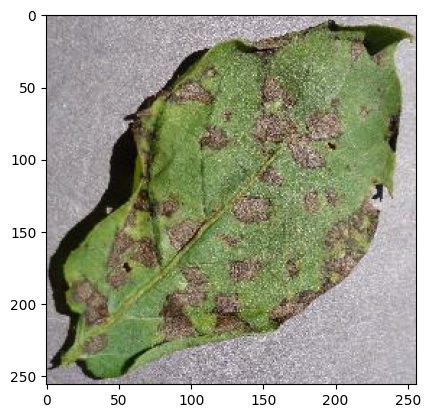

In [7]:
for image_batch,label_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype("uint8"))

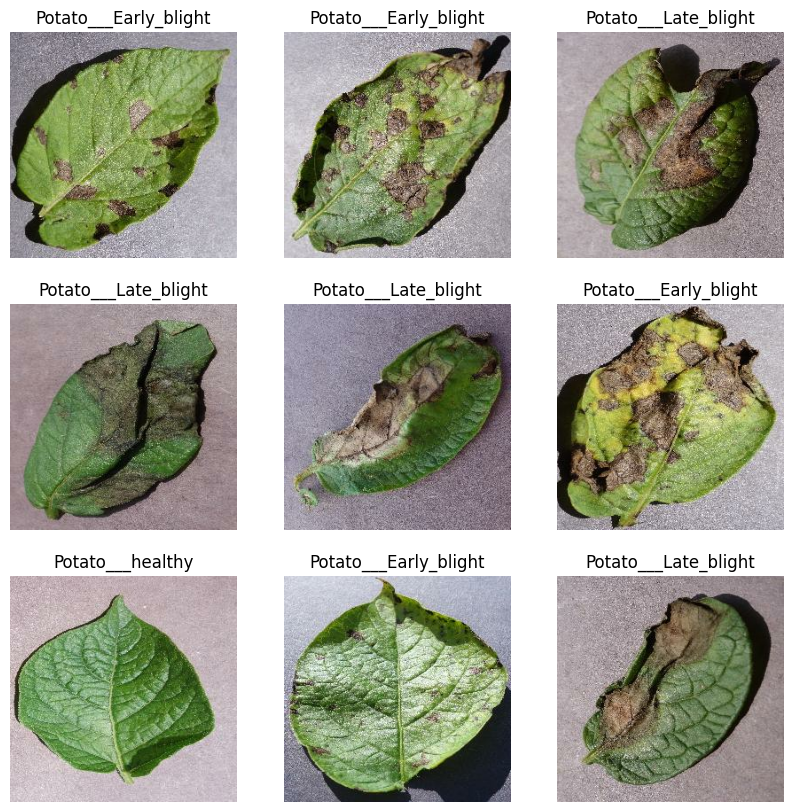

In [8]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
  for i in range (9):
    x = plt.subplot(3, 3, i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(classes[label_batch[i]])
    plt.axis("off")


In [9]:
len(dataset)

68

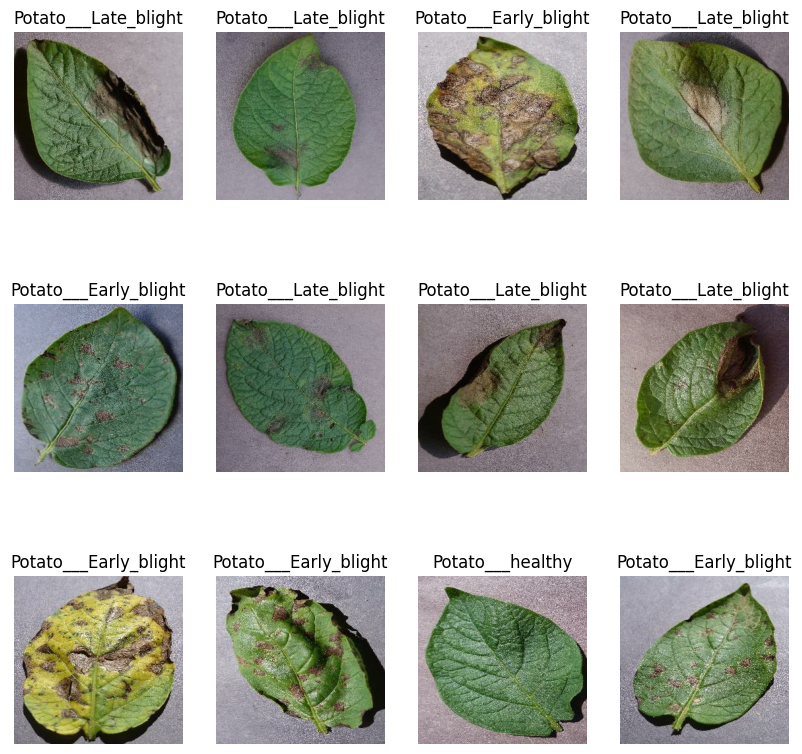

In [10]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(2):
  for i in range (12):
    x = plt.subplot(3, 4, i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(classes[label_batch[i]])
    plt.axis("off")

In [11]:
EPOCHES = 50

In [12]:
CHANNELS = 3

In [13]:
def splitting (ds, train_split = 0.8, validation_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(dataset)
    if shuffle :
      ds=ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(validation_split * ds_size)
    train_ds = dataset.take(train_size)
    val_ds= dataset.skip(train_size).take(val_size)
    test_ds = dataset.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds 


In [14]:
train_ds, val_ds, test_ds = splitting(dataset)

In [15]:
len(train_ds)

54

In [16]:
len(val_ds)

6

In [17]:
len(test_ds)

8

In [18]:
resizing_rescaling = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE), 
  layers.experimental.preprocessing.Rescaling(1.0/255),

])

In [19]:
augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),

])

In [21]:
input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classe= 3

In [22]:
model = models.Sequential([
    resizing_rescaling,
    augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classe, activation='softmax'),
])
model.build(input_shape=input_shape)

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [24]:
model.compile(
    optimizer= 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [25]:
history = model.fit(
    train_ds,
    epochs = EPOCHES,
    batch_size = BATCH_SIZE,
    verbose=1,
    validation_data=val_ds

)

Epoch 1/50
54/54 [==============================] - 289s 5s/step - loss: 0.9071 - accuracy: 0.4670 - val_loss: 0.8941 - val_accuracy: 0.4479
Epoch 2/50
54/54 [==============================] - 267s 5s/step - loss: 0.7196 - accuracy: 0.6655 - val_loss: 0.5677 - val_accuracy: 0.7344
Epoch 3/50
54/54 [==============================] - 270s 5s/step - loss: 0.4158 - accuracy: 0.8356 - val_loss: 0.4257 - val_accuracy: 0.8281
Epoch 4/50
54/54 [==============================] - 270s 5s/step - loss: 0.3442 - accuracy: 0.8600 - val_loss: 0.3340 - val_accuracy: 0.8750
Epoch 5/50
54/54 [==============================] - 279s 5s/step - loss: 0.2764 - accuracy: 0.8866 - val_loss: 0.2346 - val_accuracy: 0.8906
Epoch 6/50
54/54 [==============================] - 259s 5s/step - loss: 0.2282 - accuracy: 0.9103 - val_loss: 0.3292 - val_accuracy: 0.8906
Epoch 7/50
54/54 [==============================] - 276s 5s/step - loss: 0.2038 - accuracy: 0.9190 - val_loss: 0.2266 - val_accuracy: 0.9115
Epoch 8/50
54

In [26]:
history

In [28]:
score = model.evaluate(test_ds)

8/8 [==============================] - 12s 972ms/step - loss: 0.0333 - accuracy: 0.9828


In [29]:
score

[0.03329233080148697, 0.982758641242981]

In [30]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [34]:
history.history['accuracy']

[0.4670138955116272,
 0.6655092835426331,
 0.8356481194496155,
 0.8599537014961243,
 0.8865740895271301,
 0.9103009104728699,
 0.9189814925193787,
 0.9270833134651184,
 0.9380787014961243,
 0.9184027910232544,
 0.9421296119689941,
 0.9571759104728699,
 0.953125,
 0.9560185074806213,
 0.96875,
 0.9403935074806213,
 0.9600694179534912,
 0.9733796119689941,
 0.9774305820465088,
 0.9635416865348816,
 0.9809027910232544,
 0.9751157164573669,
 0.9728009104728699,
 0.9797453880310059,
 0.9837962985038757,
 0.9762731194496155,
 0.9809027910232544,
 0.984375,
 0.9670138955116272,
 0.9618055820465088,
 0.9814814925193787,
 0.9704861044883728,
 0.9785879850387573,
 0.9762731194496155,
 0.9861111044883728,
 0.9890046119689941,
 0.984375,
 0.9907407164573669,
 0.9861111044883728,
 0.9832175970077515,
 0.9895833134651184,
 0.9884259104728699,
 0.9907407164573669,
 0.9907407164573669,
 0.9884259104728699,
 0.9947916865348816,
 0.9797453880310059,
 0.9878472089767456,
 0.9895833134651184,
 0.984953701

In [35]:
presittion = history.history['accuracy']
validation_accuracy = ['val_accuracy']
loss=history.history['loss']
validation_loss = history.history['val_loss']

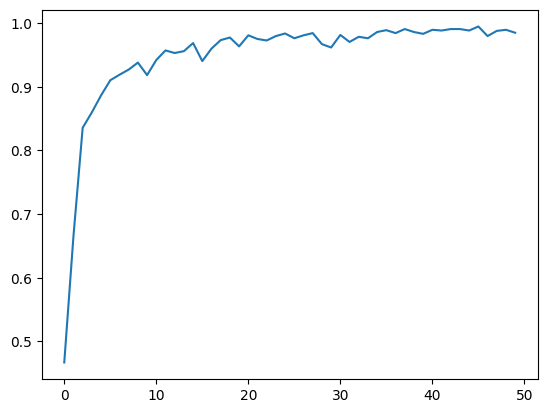

In [41]:
plt.plot(range(EPOCHES), presittion)


Text(0.5, 1.0, 'Loss_Graph')

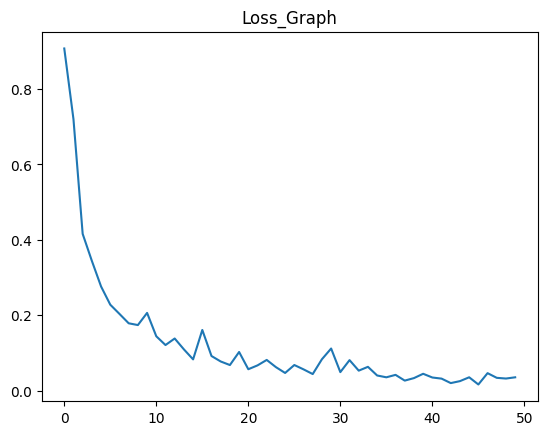

In [45]:
plt.plot(range(EPOCHES), loss)
plt.title('Loss_Graph')

AxesImage(size=(256, 256))
the label is  Potato___Late_blight


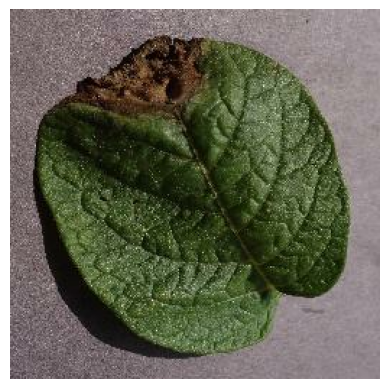

In [60]:
for image_batch , label_batch in dataset.take(1):
  first_image = plt.imshow(image_batch[0].numpy().astype('uint8'))
  first_label = classes[label_batch[0].numpy()]
  print(first_image)
  print ("the label is " , first_label)
  plt.axis("off")

In [61]:
prediction = model.predict(image_batch)
print(classes[np.argmax(prediction[0])])

1/1 [==============================] - 1s 1s/step
Potato___Late_blight


In [65]:
def prediction (model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array=tf.expand_dims(img_array, 0)
  prediction = model.predict(img_array)
  predicted_class= classes[np.argmax(prediction[0])]
  confidence = round(100 * (np.max(prediction[0])), 2)
  return predicted_class , confidence

1/1 [==============================] - 0s 84ms/step


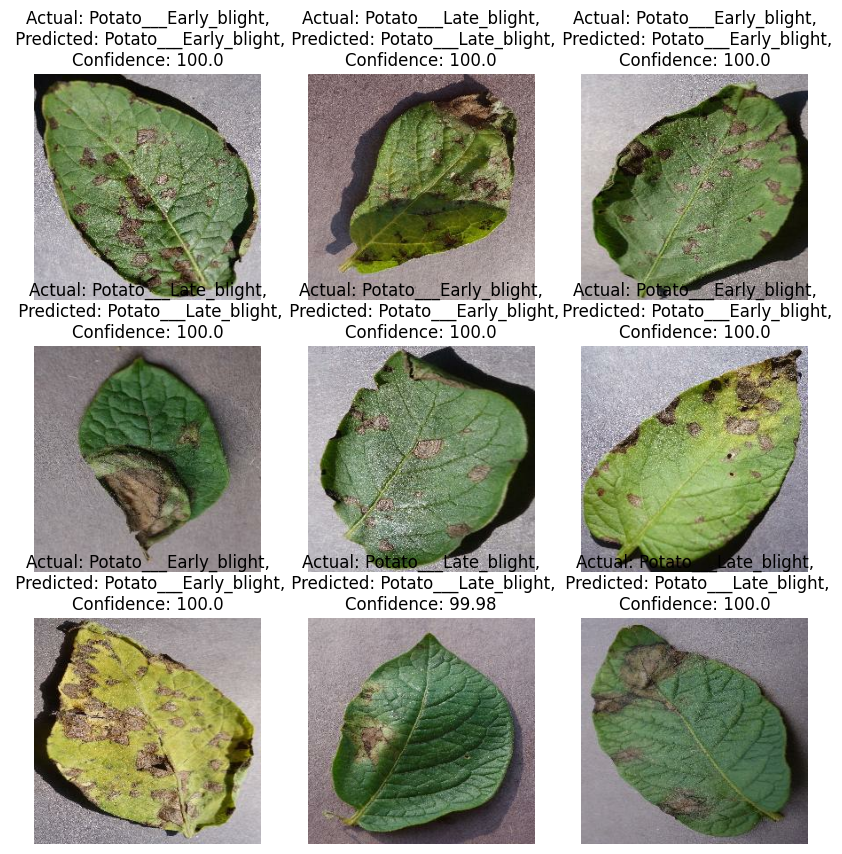

In [74]:
plt.figure(figsize=(10,10))
for images , labels in dataset.take(1):
  for i in range(9):
    y= plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    clas = classes[labels[i]]
    predicted_class, confidense = prediction(model, images[i].numpy())
    plt.axis("off")
    plt.title(f"Actual: {clas},\n Predicted: {predicted_class},\nConfidence: {confidense}")
    

In [82]:
print(tf.__version__)

2.12.0


In [90]:
tf.keras.models.save_model(model, 'model.pbtxt')
converter=tf.lite.TFLiteConverter.from_keras_model(model=model)
model_tflite = converter.convert()
open("potatoes_model.tflite", "wb").write(tflite_model)

741824

In [83]:
Keras_model_name = "tf_model_fashion_mnist.h5"

In [84]:
model.save(Keras_model_name)

In [86]:
TF_Lite_Model_Name = "tf_lite_model.tflite"


In [88]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()

In [89]:
tflite_model_name = TF_Lite_Model_Name
open(tflite_model_name, "wb").write(tflite_model)

741824